In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sn
%matplotlib inline
from scipy.optimize import curve_fit
from scipy import integrate, optimize
import warnings
warnings.filterwarnings("ignore")

In [58]:
dfall=pd.read_csv("C:\\Users\\charu\\WHO-COVID-19-global-data.csv")
dfall.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0


In [59]:
dfNW = dfall[(dfall['Country_code']=='NO')]
dfNW

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
162595,1/3/2020,NO,Norway,EURO,0,0,0,0
162596,1/4/2020,NO,Norway,EURO,0,0,0,0
162597,1/5/2020,NO,Norway,EURO,0,0,0,0
162598,1/6/2020,NO,Norway,EURO,0,0,0,0
162599,1/7/2020,NO,Norway,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
163639,11/12/2022,NO,Norway,EURO,141,1466553,0,4286
163640,11/13/2022,NO,Norway,EURO,57,1466610,0,4286
163641,11/14/2022,NO,Norway,EURO,64,1466674,0,4286
163642,11/15/2022,NO,Norway,EURO,127,1466801,0,4286


In [60]:
dfNW.drop(['Country_code',
 'WHO_region','Date_reported'],axis=1,inplace=True)

In [61]:
dfNW.isna().sum()
dfNW.fillna(0,inplace=True)
dfNW.isna().sum()

Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

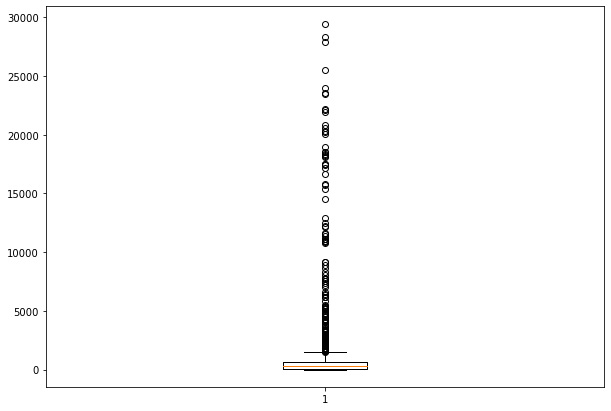

In [62]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(dfNW['New_cases'])
 
# show plot
plt.show()

In [63]:
dfNW['date'] = pd.date_range(start='1/3/2020', periods=len(dfNW), freq='D')

In [64]:
dfNW

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,date
162595,Norway,0,0,0,0,2020-01-03
162596,Norway,0,0,0,0,2020-01-04
162597,Norway,0,0,0,0,2020-01-05
162598,Norway,0,0,0,0,2020-01-06
162599,Norway,0,0,0,0,2020-01-07
...,...,...,...,...,...,...
163639,Norway,141,1466553,0,4286,2022-11-12
163640,Norway,57,1466610,0,4286,2022-11-13
163641,Norway,64,1466674,0,4286,2022-11-14
163642,Norway,127,1466801,0,4286,2022-11-15


In [65]:
dfNW= dfNW.set_index("date")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


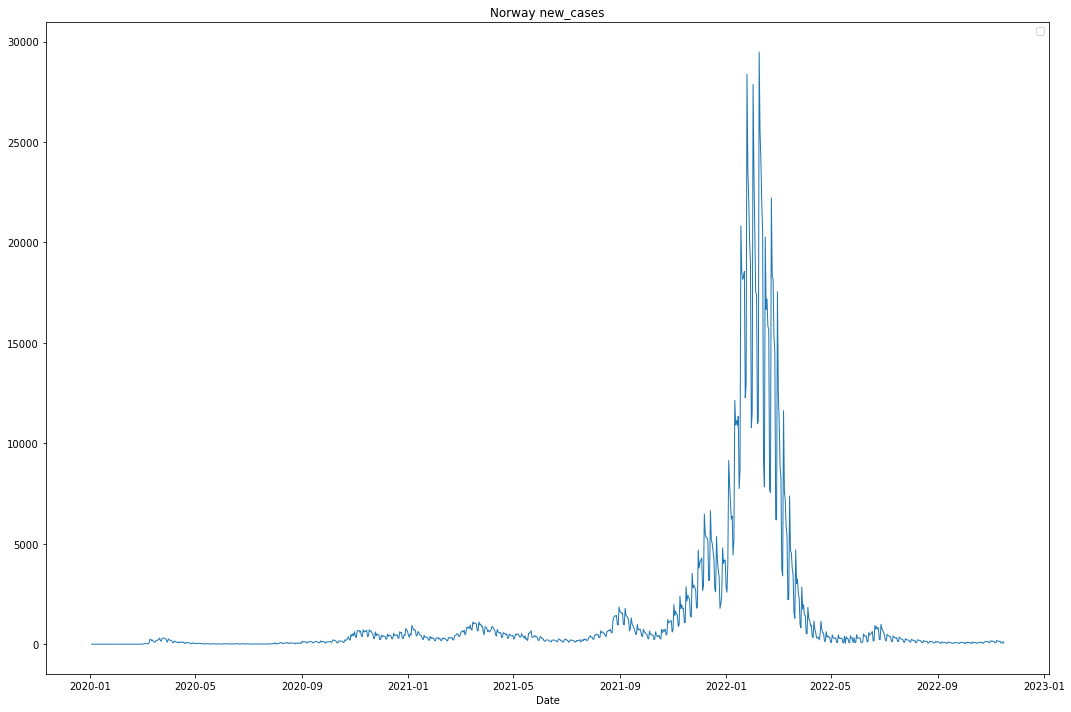

In [66]:
plt.figure(figsize=(15,10))

plt.plot(dfNW["New_cases"],linewidth=1)

plt.xlabel("Date")
plt.title("Norway new_cases")
plt.tight_layout()
plt.legend()
plt.show()

In [67]:
dfNW1 = dfNW.iloc[55:355,:]
dfNW2 = dfNW.iloc[355:,:]
dfNW3 = dfNW.iloc[55:]

In [68]:
dfNW3.tail()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
date,,,,,
2022-11-12,Norway,141,1466553,0,4286
2022-11-13,Norway,57,1466610,0,4286
2022-11-14,Norway,64,1466674,0,4286
2022-11-15,Norway,127,1466801,0,4286
2022-11-16,Norway,54,1466855,0,4286


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


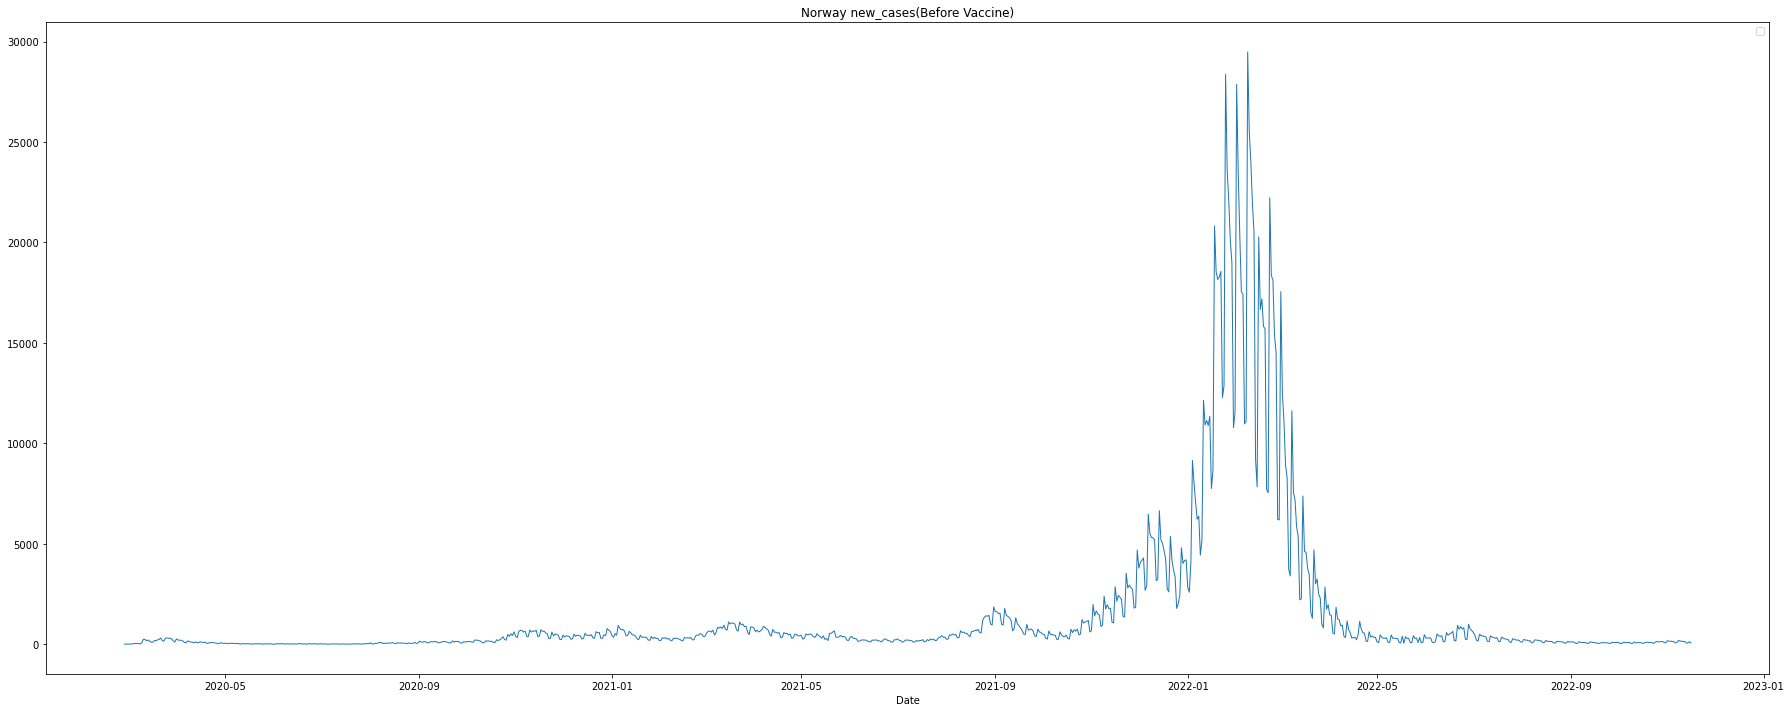

In [69]:
plt.figure(figsize=(25,10))

plt.plot(dfNW3["New_cases"],linewidth=1)

plt.xlabel("Date")
plt.title("Norway new_cases(Before Vaccine)")
plt.tight_layout()
plt.legend()
plt.show()

In [70]:
dfNW1.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
date,,,,,
2020-02-27,Norway,3,4,0,0
2020-02-28,Norway,2,6,0,0
2020-02-29,Norway,9,15,0,0
2020-03-01,Norway,6,21,0,0
2020-03-02,Norway,10,31,0,0


In [71]:
dfNW1.tail()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
date,,,,,
2020-12-18,Norway,431,43340,2,404
2020-12-19,Norway,475,43815,0,404
2020-12-20,Norway,309,44124,0,404
2020-12-21,Norway,299,44423,0,404
2020-12-22,Norway,621,45044,1,405


In [72]:
dfNW2.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
date,,,,,
2020-12-23,Norway,560,45604,0,405
2020-12-24,Norway,587,46191,16,421
2020-12-25,Norway,292,46483,0,421
2020-12-26,Norway,293,46776,0,421
2020-12-27,Norway,466,47242,0,421


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


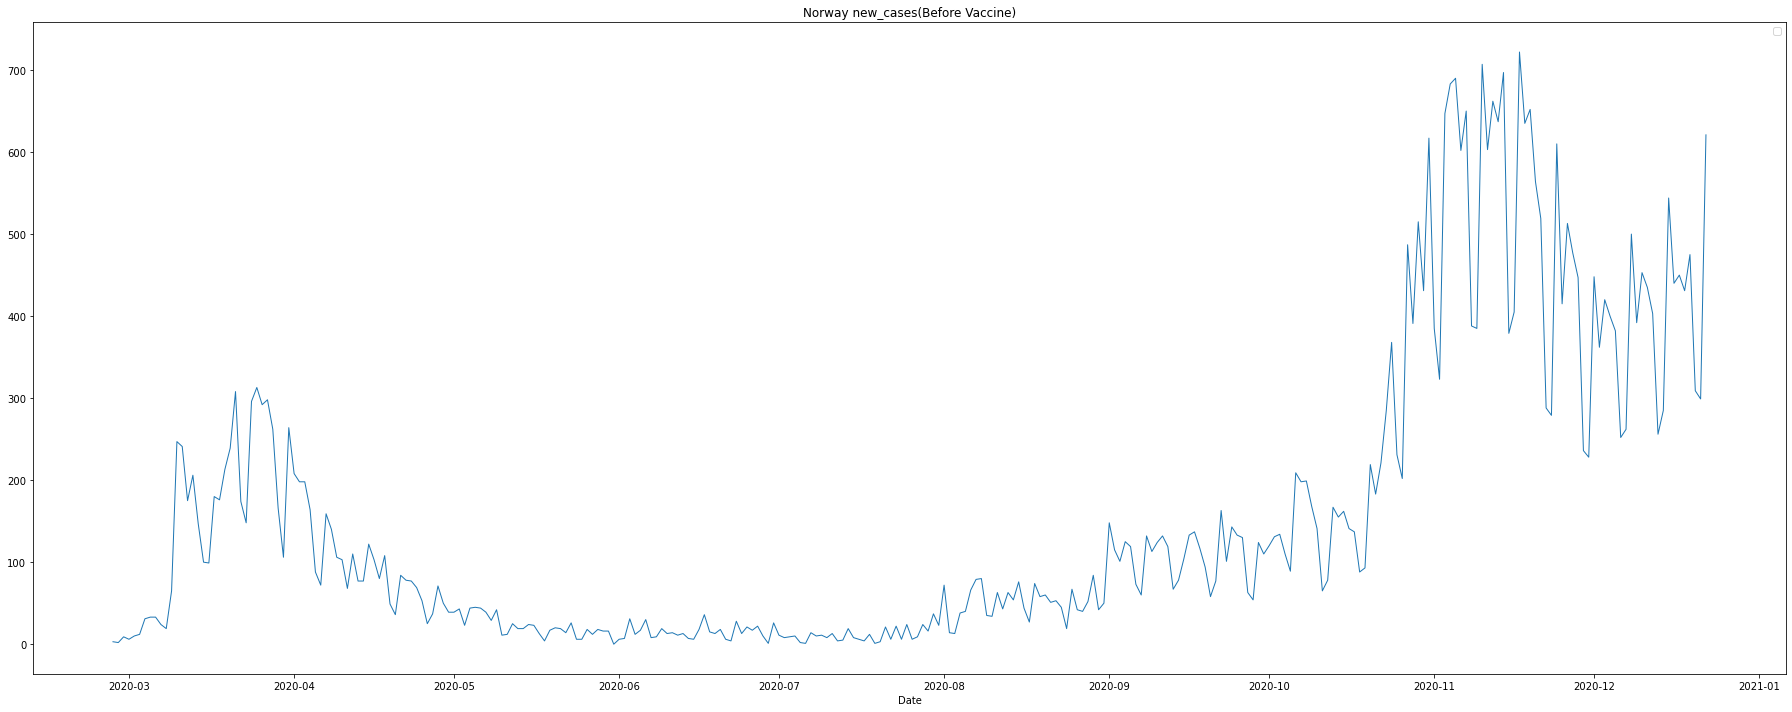

In [73]:
plt.figure(figsize=(25,10))

plt.plot(dfNW1["New_cases"],linewidth=1)

plt.xlabel("Date")
plt.title("Norway new_cases(Before Vaccine)")
plt.tight_layout()
plt.legend()
plt.show()

In [74]:
dfNW1

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
date,,,,,
2020-02-27,Norway,3,4,0,0
2020-02-28,Norway,2,6,0,0
2020-02-29,Norway,9,15,0,0
2020-03-01,Norway,6,21,0,0
2020-03-02,Norway,10,31,0,0
...,...,...,...,...,...
2020-12-18,Norway,431,43340,2,404
2020-12-19,Norway,475,43815,0,404
2020-12-20,Norway,309,44124,0,404


In [75]:
reliance = dfNW1['New_cases'].to_frame()
 
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
reliance['SMA30'] = reliance['New_cases'].rolling(6).mean()
 
# removing all the NULL values using
# dropna() method
reliance.dropna(inplace=True)
 
# printing Dataframe
reliance

,New_cases,SMA30
date,,
2020-03-03,12,7.000000
2020-03-04,31,11.666667
2020-03-05,33,16.833333
2020-03-06,33,20.833333
2020-03-07,24,23.833333
...,...,...
2020-12-18,431,401.000000
2020-12-19,475,437.500000
2020-12-20,309,441.500000


<AxesSubplot:xlabel='date'>

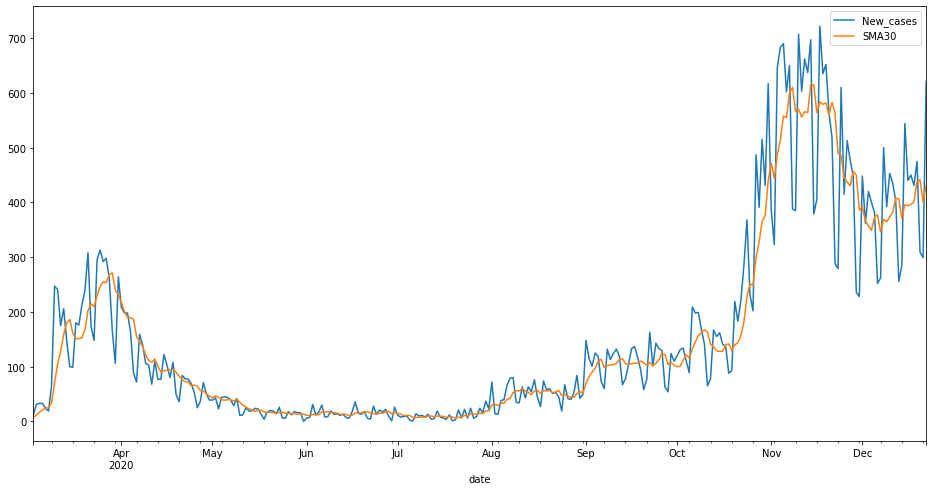

In [76]:

# plotting Close price and simple
# moving average of 30 days using .plot() method
reliance[['New_cases', 'SMA30']].plot(label='RELIANCE',
                                  figsize=(16, 8))

In [77]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas
# series into dataframe.
reliance = dfNW1['New_cases'].to_frame()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
reliance['EWMA30'] = reliance['New_cases'].ewm(span=15).mean()

# printing Dataframe
reliance


,New_cases,EWMA30
date,,
2020-02-27,3,3.000000
2020-02-28,2,2.466667
2020-02-29,9,4.940828
2020-03-01,6,5.260767
2020-03-02,10,6.476975
...,...,...
2020-12-18,431,409.822057
2020-12-19,475,417.969300
2020-12-20,309,404.348137


<AxesSubplot:xlabel='date'>

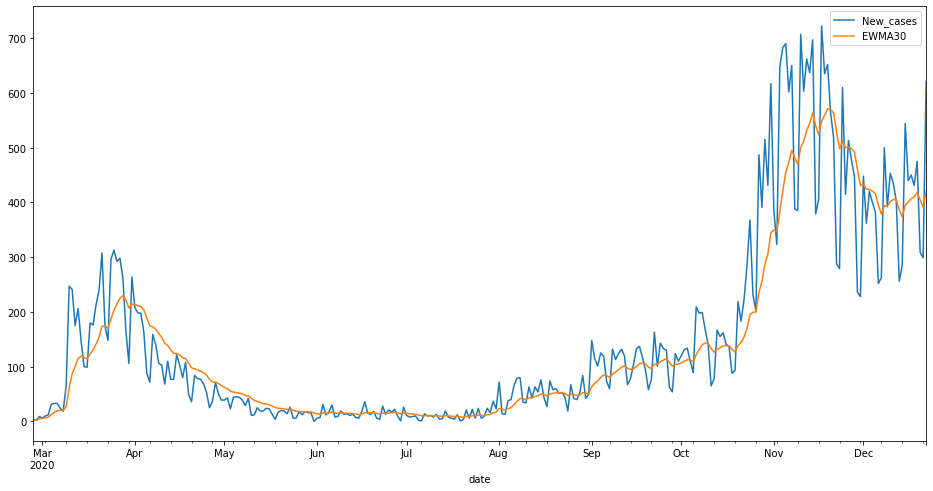

In [78]:
# plotting Close price and exponential
# moving averages of 30 days
# using .plot() method
reliance[['New_cases', 'EWMA30']].plot(label='RELIANCE',figsize=(16, 8))

In [79]:
dfNW1

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
date,,,,,
2020-02-27,Norway,3,4,0,0
2020-02-28,Norway,2,6,0,0
2020-02-29,Norway,9,15,0,0
2020-03-01,Norway,6,21,0,0
2020-03-02,Norway,10,31,0,0
...,...,...,...,...,...
2020-12-18,Norway,431,43340,2,404
2020-12-19,Norway,475,43815,0,404
2020-12-20,Norway,309,44124,0,404


In [80]:
dfNW1['New_cases'].values

array([  3,   2,   9,   6,  10,  12,  31,  33,  33,  24,  19,  65, 247,
       241, 175, 206, 147, 100,  99, 180, 176, 213, 239, 308, 174, 148,
       296, 313, 292, 298, 262, 166, 106, 264, 208, 198, 198, 164,  88,
        72, 159, 140, 106, 103,  68, 110,  77,  77, 122, 103,  80, 108,
        49,  36,  84,  78,  77,  69,  53,  25,  37,  71,  50,  39,  39,
        43,  23,  44,  45,  44,  39,  29,  42,  11,  12,  25,  19,  19,
        24,  23,  13,   4,  17,  20,  19,  14,  26,   6,   6,  18,  12,
        18,  16,  16,   0,   6,   7,  31,  12,  17,  30,   8,   9,  19,
        13,  14,  11,  13,   7,   6,  18,  36,  15,  13,  18,   6,   4,
        28,  13,  21,  17,  22,  10,   1,  26,  11,   8,   9,  10,   2,
         1,  14,  10,  11,   8,  13,   4,   5,  19,   8,   6,   4,  12,
         1,   3,  21,   6,  22,   6,  24,   6,   9,  24,  16,  37,  23,
        72,  14,  13,  38,  40,  66,  79,  80,  35,  34,  63,  43,  63,
        54,  76,  44,  27,  74,  58,  60,  51,  53,  45,  19,  6

In [81]:
from sklearn import preprocessing

x = dfNW1['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))


In [82]:
dfNW1["New_cases_Nor"]=x_scaled

In [83]:
dfNW1.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,New_cases_Nor
date,,,,,,
2020-02-27,Norway,3,4,0,0,0.004155
2020-02-28,Norway,2,6,0,0,0.002770
2020-02-29,Norway,9,15,0,0,0.012465
2020-03-01,Norway,6,21,0,0,0.008310
2020-03-02,Norway,10,31,0,0,0.013850


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


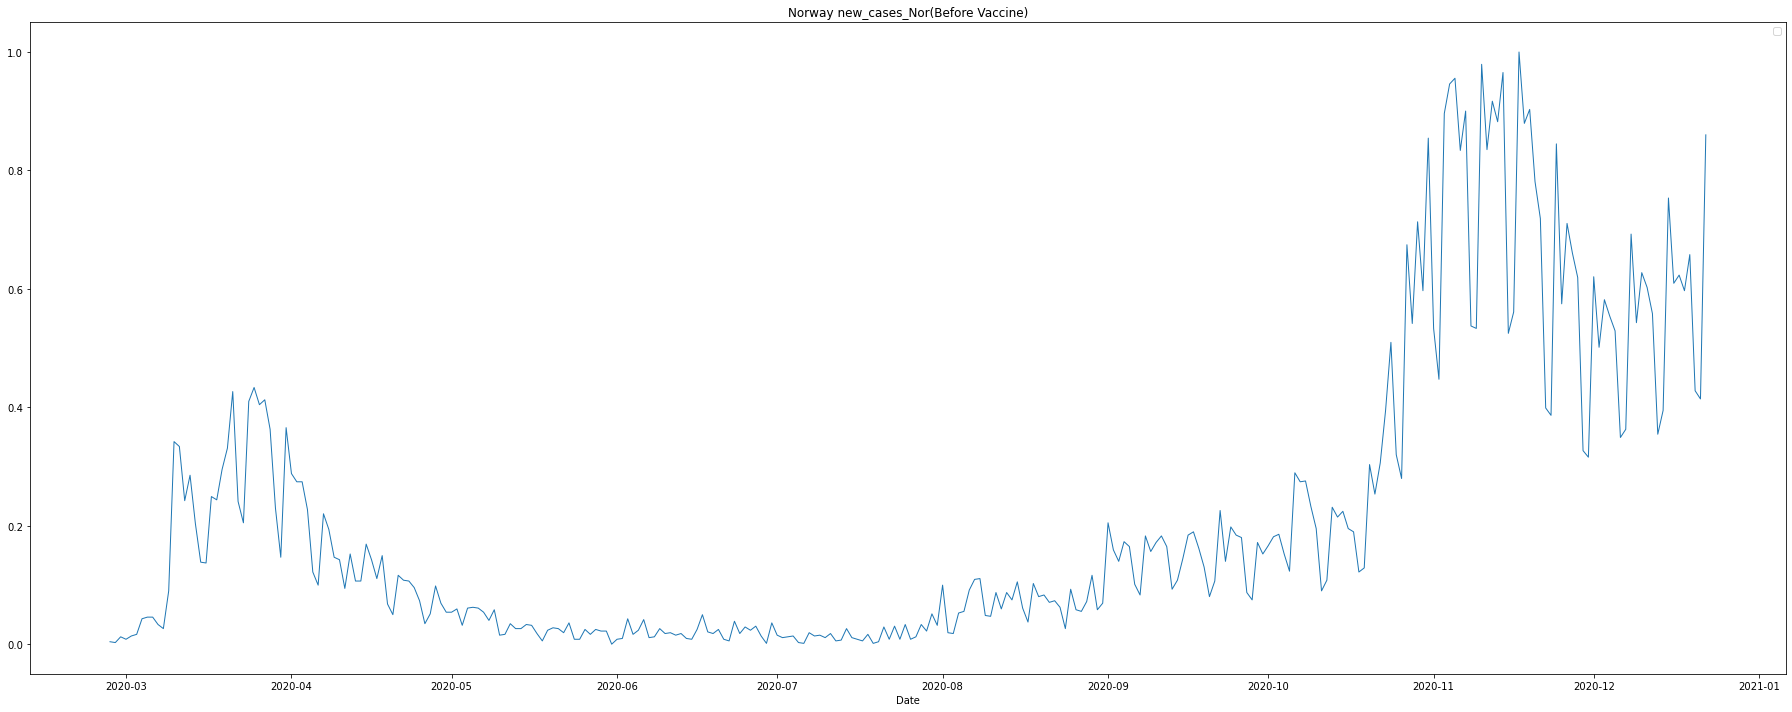

In [84]:
plt.figure(figsize=(25,10))

plt.plot(dfNW1["New_cases_Nor"],linewidth=1)

plt.xlabel("Date")
plt.title("Norway new_cases_Nor(Before Vaccine)")
plt.tight_layout()
plt.legend()
plt.show()

In [85]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas
# series into dataframe.
reliance = dfNW1['New_cases_Nor'].to_frame()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
reliance['EWMA30'] = reliance['New_cases_Nor'].ewm(span=15).mean()

# printing Dataframe
reliance


,New_cases_Nor,EWMA30
date,,
2020-02-27,0.004155,0.004155
2020-02-28,0.002770,0.003416
2020-02-29,0.012465,0.006843
2020-03-01,0.008310,0.007286
2020-03-02,0.013850,0.008971
...,...,...
2020-12-18,0.596953,0.567621
2020-12-19,0.657895,0.578905
2020-12-20,0.427978,0.560039


<AxesSubplot:xlabel='date'>

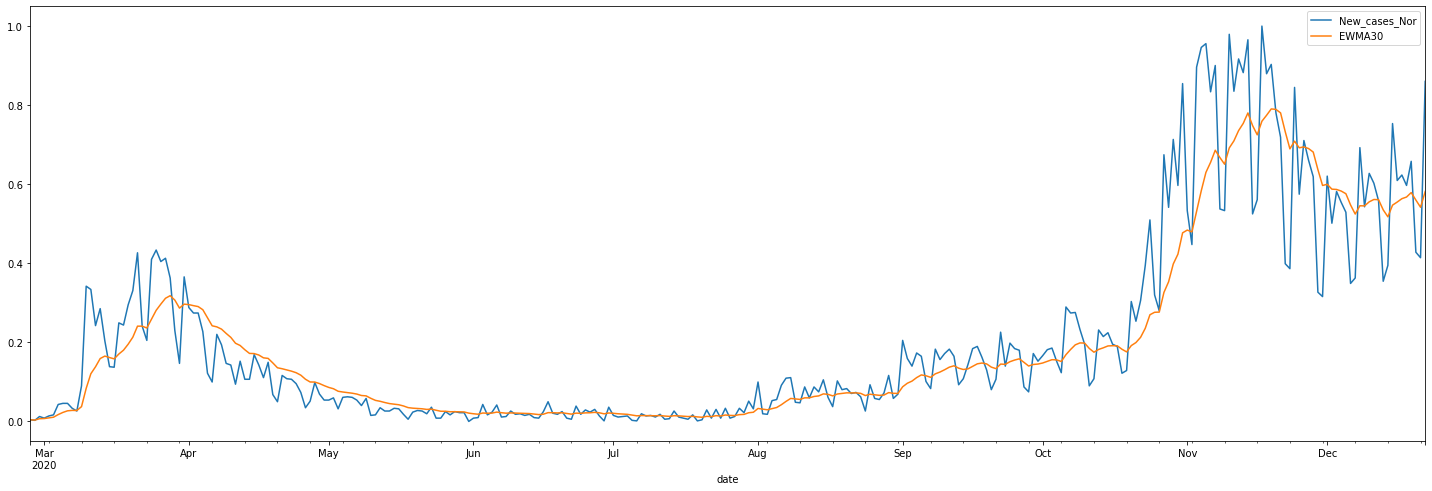

In [86]:
# plotting Close price and exponential
# moving averages of 30 days
# using .plot() method
reliance[['New_cases_Nor', 'EWMA30']].plot(label='RELIANCE',figsize=(25, 8))

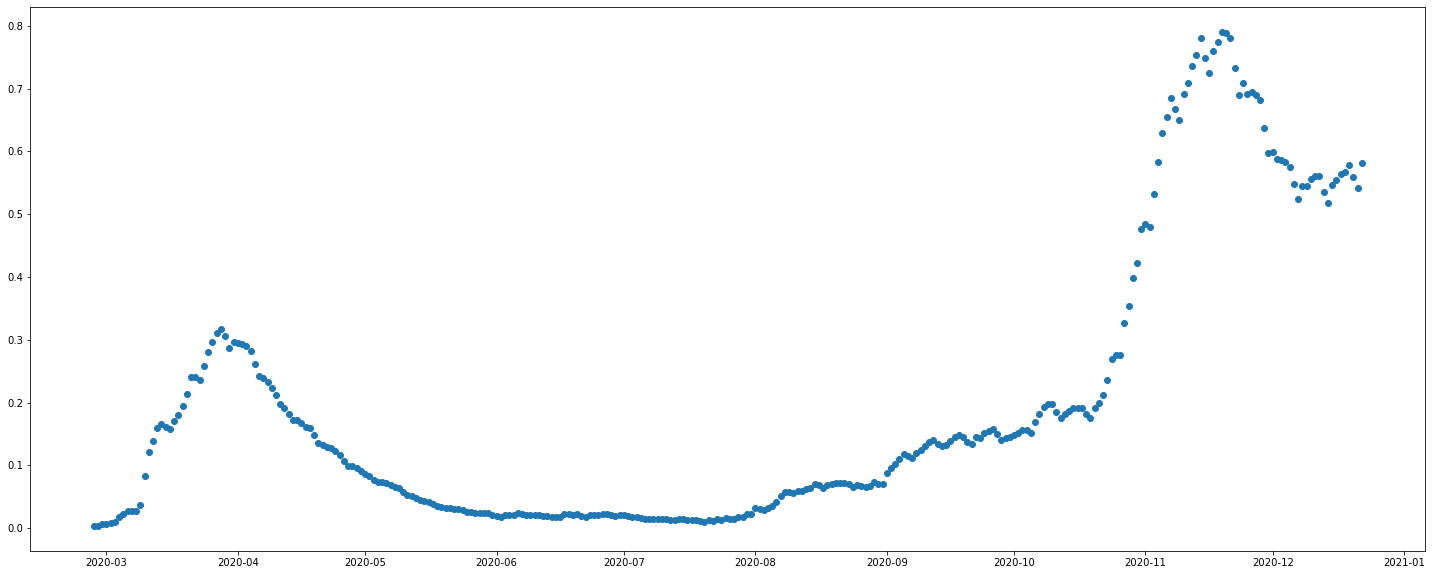

In [87]:
plt.figure(figsize=(25,10))
plt.scatter(reliance.index,reliance["EWMA30"])
plt.show()

In [88]:
def SIR(X, t, beta, gamma, N):
    """
    S = X[0], I=X[1], R=X[2]
    """
    dSdt = -beta*X[0]*X[1]/N
    dIdt = -dSdt - gamma*X[1]
    dRdt = gamma*X[1]
    return [dSdt, dIdt, dRdt]


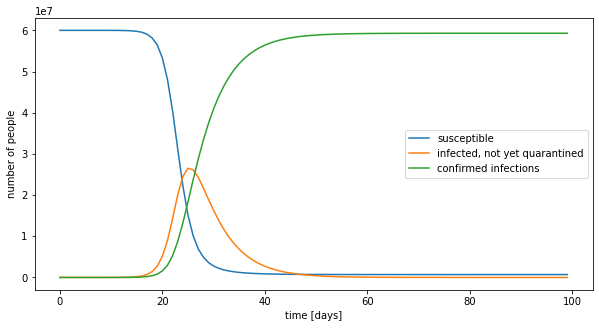

In [89]:
    beta, gamma, N = 0.9, 0.2, 6*10**7
    I0 = 5
    X0 = [N-I0, I0, 0]
    ts = np.linspace(0, 100 - 1, 100)
    Xs = odeint(SIR, X0, ts, args=(beta, gamma, N))
    
    f = plt.figure(figsize=(10,5))
    plt.plot(ts, Xs[:,0], label='susceptible');
    plt.plot(ts, Xs[:,1], label='infected, not yet quarantined');
    plt.plot(ts, Xs[:,2], label='confirmed infections');
    plt.ylabel("number of people", fontsize=10);
    plt.xlabel("time [days]", fontsize=10);
    plt.legend()
    plt.show()

In [90]:
reliance.EWMA30.count

<bound method Series.count of date
2020-02-27    0.004155
2020-02-28    0.003416
2020-02-29    0.006843
2020-03-01    0.007286
2020-03-02    0.008971
                ...   
2020-12-18    0.567621
2020-12-19    0.578905
2020-12-20    0.560039
2020-12-21    0.541800
2020-12-22    0.581589
Name: EWMA30, Length: 300, dtype: float64>

In [91]:
population = float(1)
#reliance['EWMA30'] = list(range(1,len(reliance)+1))

In [92]:
#To change the number of days created change the number of periods
ten_days = pd.date_range(start='2020-02-27', periods=300)
print(ten_days)

DatetimeIndex(['2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07',
               ...
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22'],
              dtype='datetime64[ns]', length=300, freq='D')


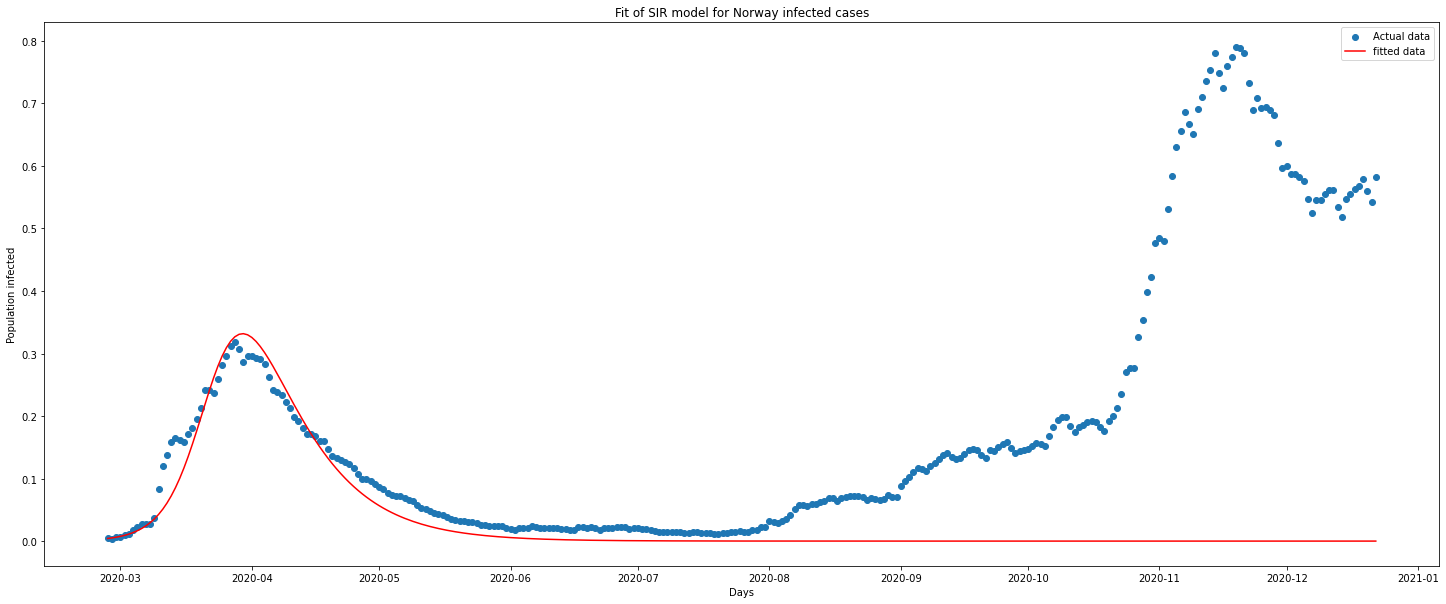

Optimal parameters: beta = 0.2880589352723336  and gamma =  0.08841687635726017


In [93]:
ydata = [i for i in reliance.EWMA30]
ydata = np.array(ydata, dtype=float)
xdata = np.linspace(0,300,300)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    beta >= 0
    gamma >= 0
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance.index,reliance["EWMA30"],label='Actual data')
plt.plot(ten_days, fitted,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

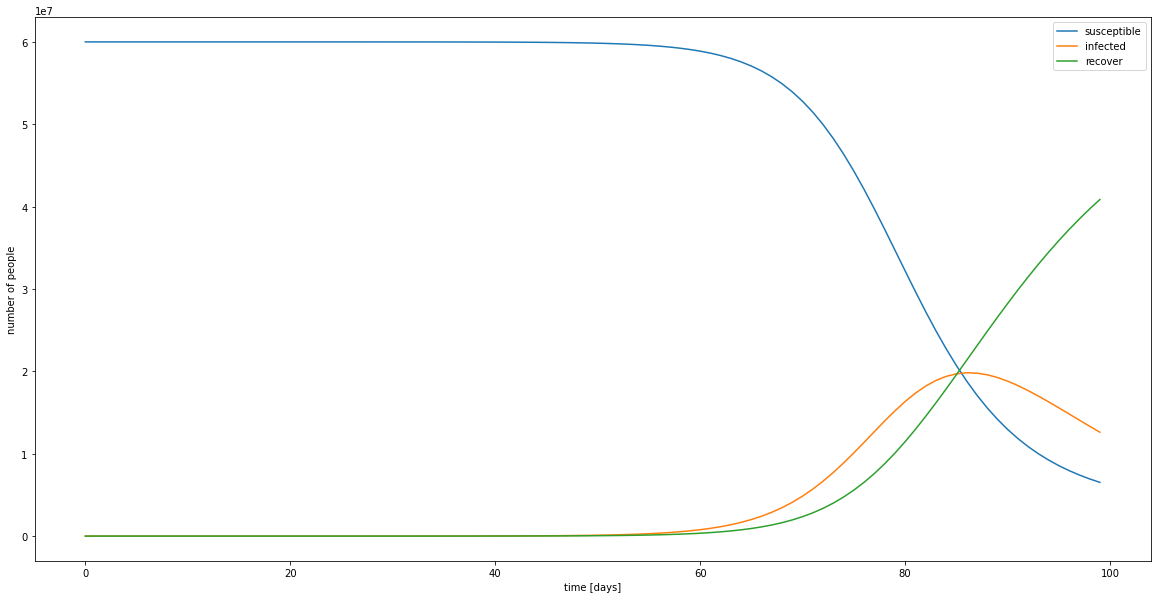

In [94]:
def SIR(X, t, beta, gamma, N):
    """
    S = X[0], I=X[1], R=X[2]
    """
    dSdt = -beta*X[0]*X[1]/N
    dIdt = -dSdt - gamma*X[1]
    dRdt = gamma*X[1]
    return [dSdt, dIdt, dRdt]

beta, gamma, N = 0.2880589352723336, 0.08841687635726017, 6*10**7
I0 = 5
X0 = [N-I0, I0, 0]
ts = np.linspace(0, 100 - 1, 100)
Xs = odeint(SIR, X0, ts, args=(beta, gamma, N))
    
f = plt.figure(figsize=(20,10))
plt.plot(ts, Xs[:,0], label='susceptible');
plt.plot(ts, Xs[:,1], label='infected');
plt.plot(ts, Xs[:,2], label='recover');
plt.ylabel("number of people", fontsize=10);
plt.xlabel("time [days]", fontsize=10);
plt.legend()
plt.show()


#After 1st Vaccination date

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


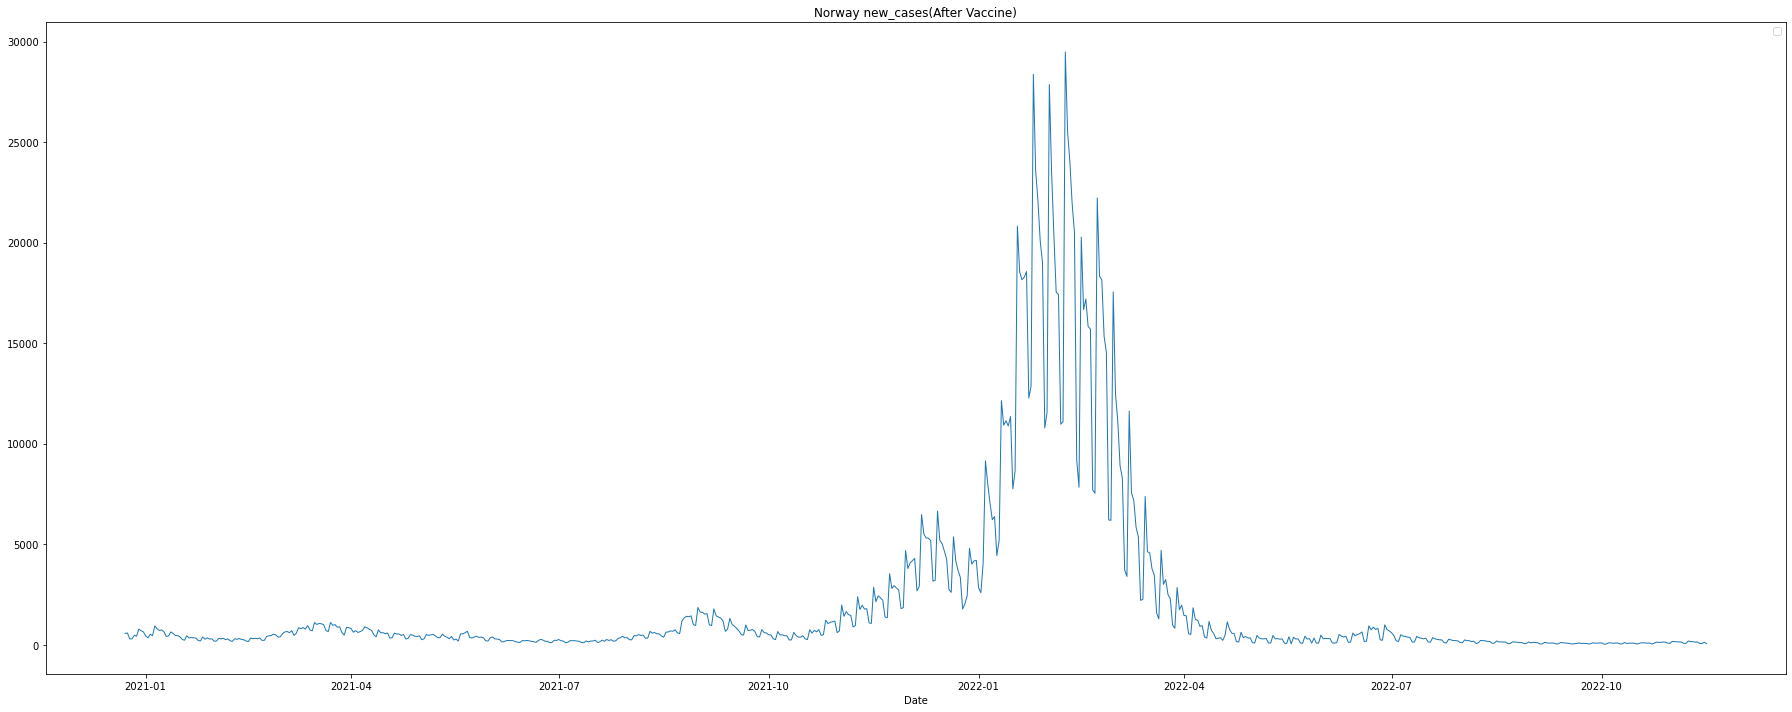

In [95]:
plt.figure(figsize=(25,10))

plt.plot(dfNW2["New_cases"],linewidth=1)

plt.xlabel("Date")
plt.title("Norway new_cases(After Vaccine)")
plt.tight_layout()
plt.legend()
plt.show()

In [96]:
x2 = dfNW2['New_cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x2_scaled = min_max_scaler.fit_transform(x2.reshape(-1,1))

In [97]:
dfNW2["New_cases_Nor"]=x2_scaled

In [98]:
dfNW2.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,New_cases_Nor
date,,,,,,
2020-12-23,Norway,560,45604,0,405,0.018064
2020-12-24,Norway,587,46191,16,421,0.018981
2020-12-25,Norway,292,46483,0,421,0.008964
2020-12-26,Norway,293,46776,0,421,0.008998
2020-12-27,Norway,466,47242,0,421,0.014872


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


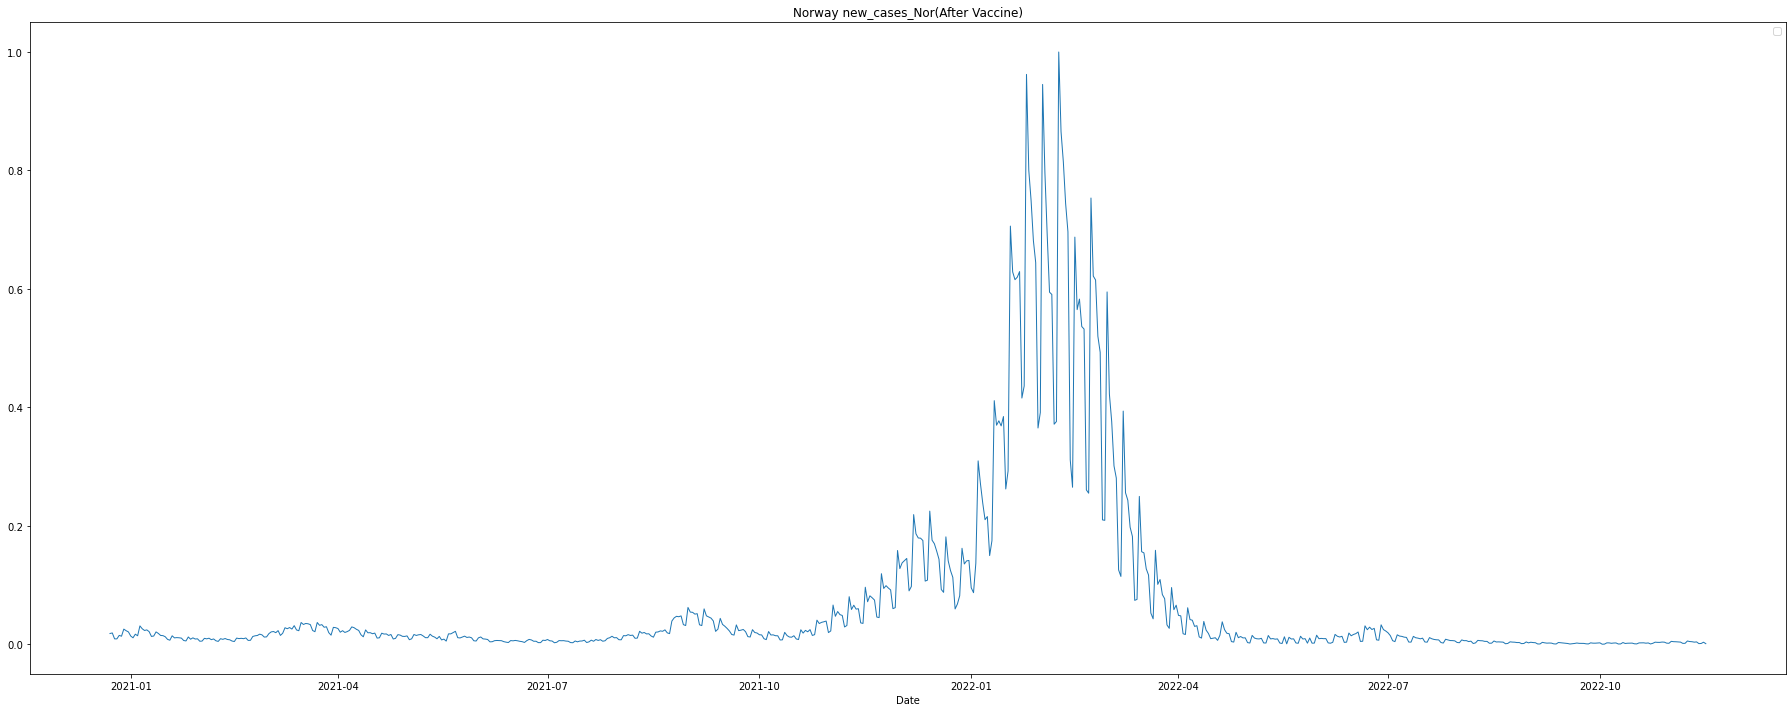

In [99]:
plt.figure(figsize=(25,10))

plt.plot(dfNW2["New_cases_Nor"],linewidth=1)

plt.xlabel("Date")
plt.title("Norway new_cases_Nor(After Vaccine)")
plt.tight_layout()
plt.legend()
plt.show()

In [100]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas
# series into dataframe.
reliance2 = dfNW2['New_cases_Nor'].to_frame()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
reliance2['EWMA30'] = reliance2['New_cases_Nor'].ewm(span=15).mean()

# printing Dataframe
reliance2


,New_cases_Nor,EWMA30
date,,
2020-12-23,0.018064,0.018064
2020-12-24,0.018981,0.018553
2020-12-25,0.008964,0.014922
2020-12-26,0.008998,0.013132
2020-12-27,0.014872,0.013579
...,...,...
2022-11-12,0.003837,0.003415
2022-11-13,0.000985,0.003111
2022-11-14,0.001222,0.002875


<AxesSubplot:xlabel='date'>

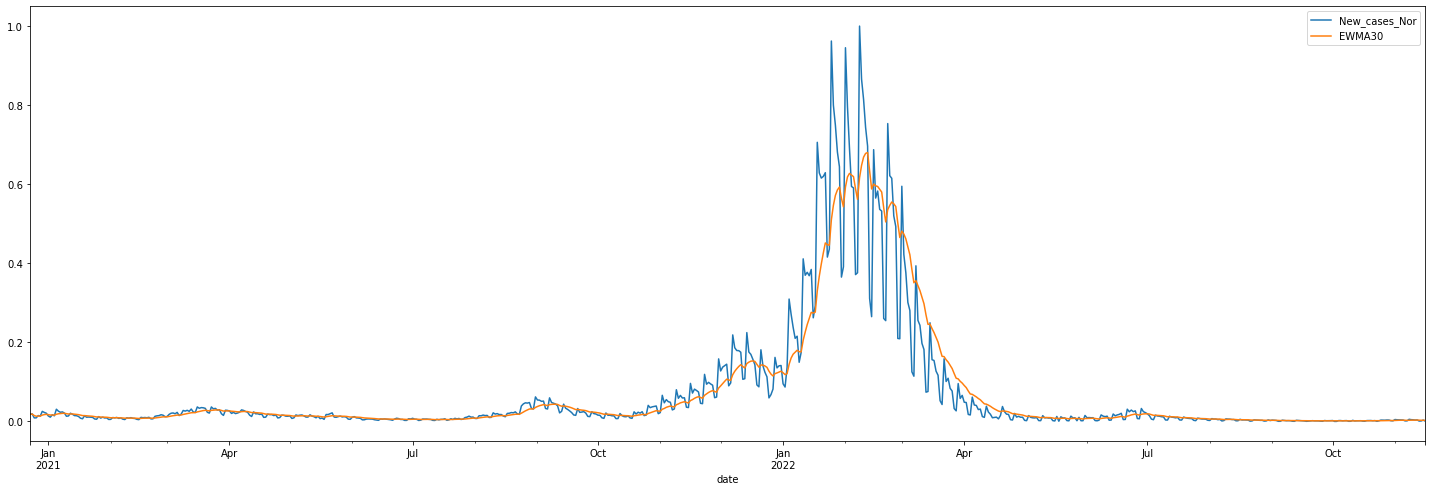

In [101]:
# plotting Close price and exponential
# moving averages of 30 days
# using .plot() method
reliance2[['New_cases_Nor', 'EWMA30']].plot(label='RELIANCE2',figsize=(25, 8))

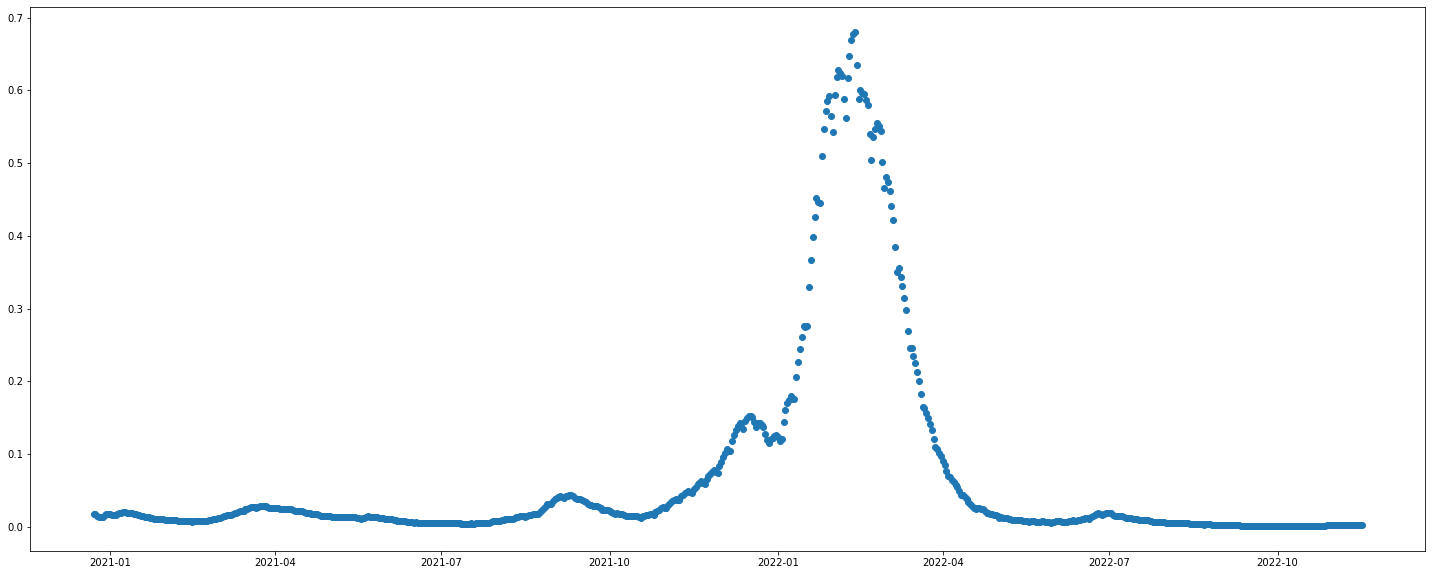

In [102]:
plt.figure(figsize=(25,10))
plt.scatter(reliance2.index,reliance2["EWMA30"])
plt.show()

In [103]:
import plotly.express as px
fig = px.scatter(x=reliance2.index, y=reliance2["EWMA30"])

fig.show()

In [104]:
reliance2.EWMA30.count

<bound method Series.count of date
2020-12-23    0.018064
2020-12-24    0.018553
2020-12-25    0.014922
2020-12-26    0.013132
2020-12-27    0.013579
                ...   
2022-11-12    0.003415
2022-11-13    0.003111
2022-11-14    0.002875
2022-11-15    0.002936
2022-11-16    0.002679
Name: EWMA30, Length: 694, dtype: float64>

In [105]:
#To change the number of days created change the number of periods
ten_days2 = pd.date_range(start='2020-12-23', periods=694)
print(ten_days2)

DatetimeIndex(['2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01',
               ...
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14',
               '2022-11-15', '2022-11-16'],
              dtype='datetime64[ns]', length=694, freq='D')


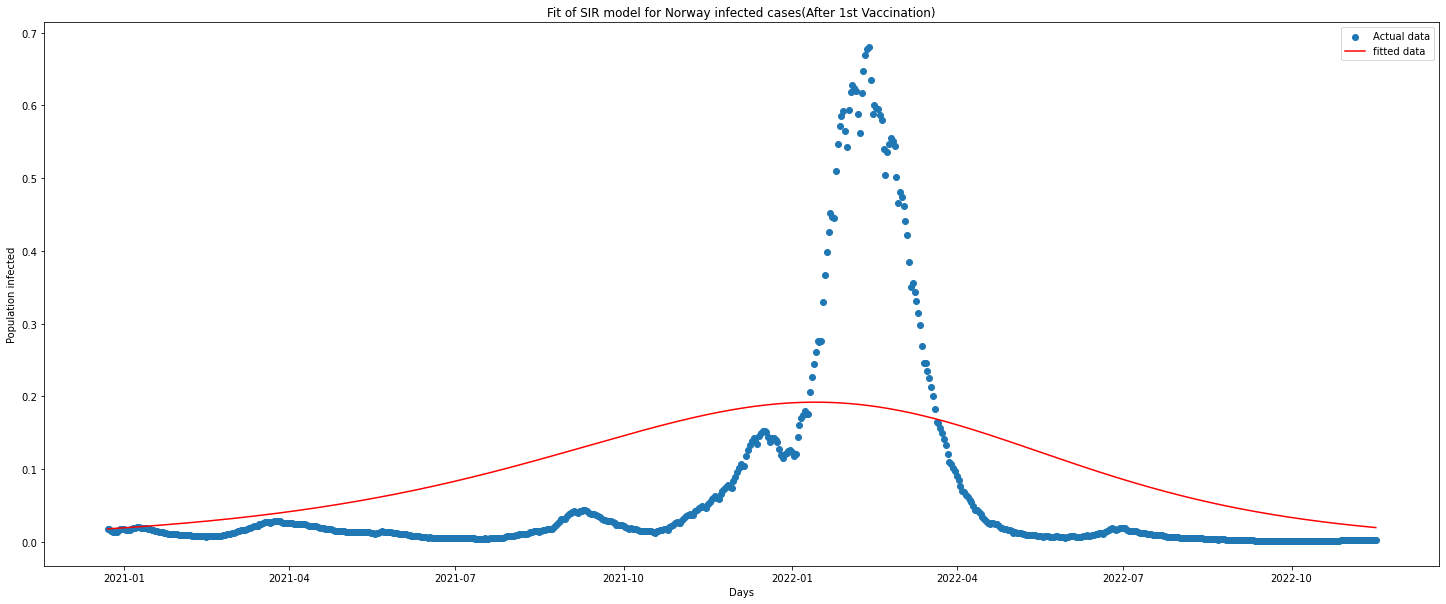

Optimal parameters: beta = -0.013485903441009386  and gamma =  -0.02187596955767656


In [106]:
y2data = [i for i in reliance2.EWMA30]
y2data = np.array(y2data, dtype=float)
x2data = np.linspace(0,694,694)

N = 1
inf0 = y2data[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    #if beta > 0 and gamma > 0:
        sus = -beta * y[0] * y[1] / N
        rec = gamma * y[1]
        inf = -(sus + rec)
        return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x2data, y2data)
fitted2 = fit_odeint(x2data, *popt)

plt.figure(figsize=(25,10))
plt.scatter(reliance2.index,reliance2["EWMA30"],label='Actual data')
plt.plot(ten_days2, fitted2,'r',label='fitted data')
plt.title("Fit of SIR model for Norway infected cases(After 1st Vaccination)")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

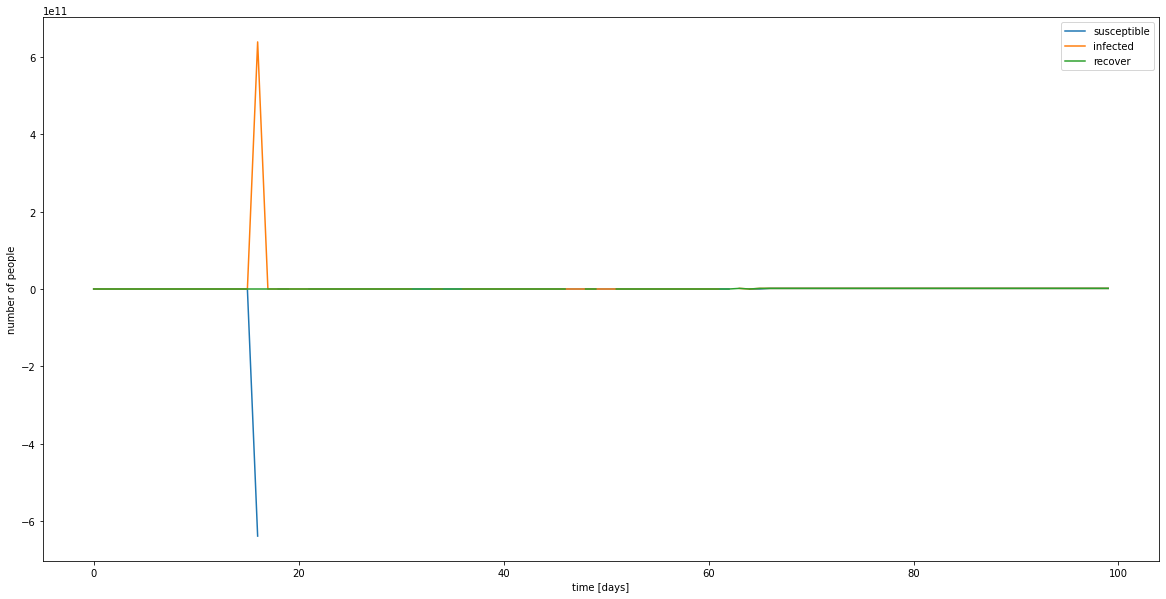

In [107]:
beta, gamma, N = -0.013485903441009386, -0.02187596955767656, 1
I0 = 5
X0 = [N-I0, I0, 0]
ts = np.linspace(0, 100 - 1, 100)
Xs = odeint(SIR, X0, ts, args=(beta, gamma, N))
    
f = plt.figure(figsize=(20,10))
plt.plot(ts, Xs[:,0], label='susceptible');
plt.plot(ts, Xs[:,1], label='infected');
plt.plot(ts, Xs[:,2], label='recover');
plt.ylabel("number of people", fontsize=10);
plt.xlabel("time [days]", fontsize=10);
plt.legend()
plt.show()
